In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np

house_price = pd.read_csv('London_House_price.csv')
crime_rate = pd.read_csv ('crime_rate.csv')
earning_per_hour = pd.read_csv ('earning_per_hour.csv')
job_density = pd.read_csv ('job_density.csv')
pop_density = pd.read_csv('London_pop_density.csv')
tax = pd.read_csv('tax.csv')

In [22]:
house_price.columns = house_price.columns.astype(str)
crime_rate.columns = crime_rate.columns.astype(str)
earning_per_hour.columns = earning_per_hour.columns.astype(str)
job_density.columns = job_density.columns.astype(str)
pop_density.columns = pop_density.columns.astype(str)
tax.columns = tax.columns.astype(str)
print(list(tax.columns.values))

['Code', 'Local authority', '2010', '2015', 'tax_diff']


In [23]:
print(job_density.head())

        Code                  Area  2010  2011  2012  2013  2014  2015  \
0  E09000002  Barking and Dagenham  0.44  0.45  0.46  0.44  0.47  0.48   
1  E09000003                Barnet  0.61  0.62  0.65  0.66  0.68  0.68   
2  E09000004                Bexley  0.53  0.53  0.53  0.54  0.53  0.57   
3  E09000005                 Brent  0.54  0.53  0.57  0.57  0.60  0.62   
4  E09000006               Bromley  0.61  0.61  0.62  0.64  0.63  0.61   

   job_density_diff  
0          0.090909  
1          0.114754  
2          0.075472  
3          0.148148  
4          0.000000  


In [24]:
house_price.rename(columns = {'Area':'Borough'}, inplace = True)
earning_per_hour.rename(columns = {'Area':'Borough'}, inplace = True)
job_density.rename(columns = {'Area':'Borough'}, inplace = True)
pop_density.rename(columns = {'Area name':'Borough'}, inplace = True)
tax.rename(columns = {'Local authority':'Borough'}, inplace = True)

In [25]:
print(house_price['Borough'].count())
print(crime_rate['Borough'].count())
print(earning_per_hour['Borough'].count())
print(job_density['Borough'].count())
print(pop_density['Borough'].count())
print(tax['Borough'].count())

32
32
32
32
32
32


In [49]:
merge_1 = pd.merge(house_price, crime_rate, on='Borough')
merge_2 = pd.merge(merge_1, earning_per_hour, on='Borough')
merge_3 = pd.merge(merge_2, job_density, on='Borough')
merge_4 = pd.merge(merge_3, pop_density, on='Borough')
merge_final = pd.merge(merge_4, tax, on='Borough')

print(merge_final[['Borough','house_price_diff','crime_rate_diff','earning_per_hour_diff','job_density_diff','pop_density_diff','tax_diff']])

                   Borough  house_price_diff  crime_rate_diff  \
0     Barking and Dagenham          0.401649        -0.175405   
1                   Barnet          0.436949        -0.099863   
2                   Bexley          0.365080        -0.124161   
3                    Brent          0.522819        -0.167355   
4                  Bromley          0.422920        -0.088235   
5                   Camden          0.534312        -0.214062   
6                  Croydon          0.404427        -0.152993   
7                   Ealing          0.496831        -0.248808   
8                  Enfield          0.385643        -0.091027   
9                Greenwich          0.448679        -0.174587   
10                 Hackney          0.686570        -0.127696   
11  Hammersmith and Fulham          0.514830        -0.143820   
12                Haringey          0.528352        -0.019527   
13                  Harrow          0.398534        -0.155309   
14                Haverin

In [27]:
# intialise data of lists. 
final_data = {'Borough':merge_final['Borough'], 
              'house_price_diff':merge_final['house_price_diff'],
              'crime_rate_diff':merge_final['crime_rate_diff'],
              'earning_per_hour_diff':merge_final['earning_per_hour_diff'],
              'job_density_diff':merge_final['job_density_diff'],
              'pop_density_diff':merge_final['pop_density_diff'],
              'tax_diff':merge_final['tax_diff']
              }

# Create DataFrame 
final_data = pd.DataFrame(final_data) 
  
# Print the output. 
print(list(final_data['Borough']))

['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster']


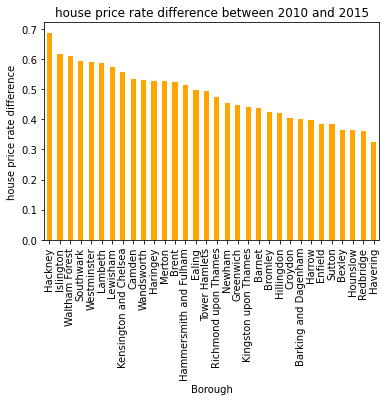

In [28]:
house_price_diff = final_data.groupby('Borough')['house_price_diff'].mean().sort_values(ascending=False)
house_price_diff.plot(kind='bar',color='orange')  
plt.title("house price rate difference between 2010 and 2015")
plt.xlabel("Borough")
plt.ylabel("house price rate difference")
plt.show()

In [29]:
final_data.describe()

,house_price_diff,crime_rate_diff,earning_per_hour_diff,job_density_diff,pop_density_diff,tax_diff
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.482589,-0.154938,0.015171,0.131048,0.076881,-0.007179
std,0.090616,0.063105,0.052658,0.082629,0.041256,0.018049
min,0.324083,-0.310825,-0.157136,-0.037037,-0.014658,-0.088080
25%,0.403733,-0.182454,-0.003277,0.087050,0.053547,-0.011562
50%,0.482639,-0.153816,0.018775,0.122389,0.079779,-0.010277
75%,0.539507,-0.114239,0.053733,0.206136,0.103931,0.004117
max,0.686570,-0.019527,0.107023,0.290909,0.190719,0.022047


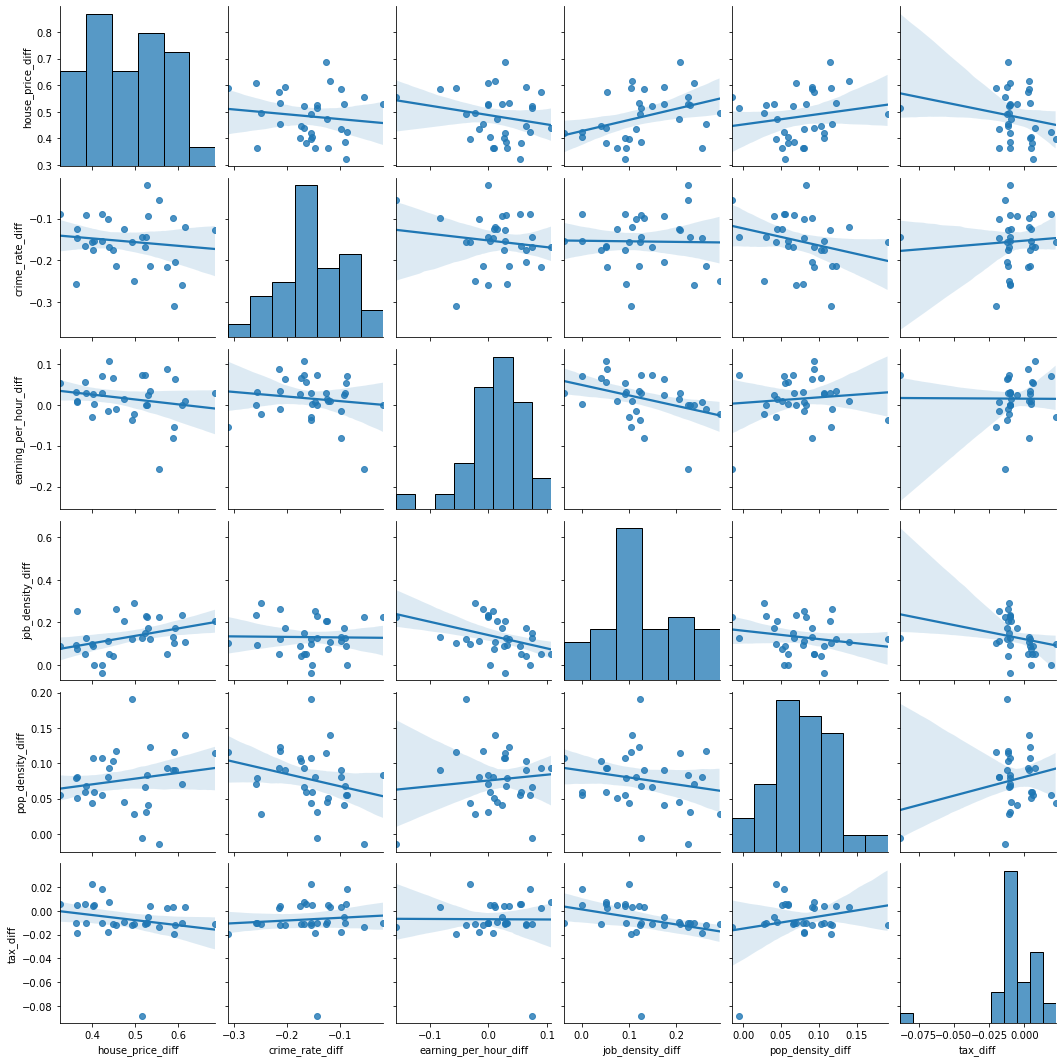

In [30]:
import seaborn as sns

sns.pairplot(final_data, kind="reg")
plt.show()



/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

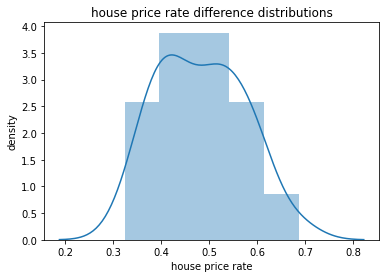

In [31]:
house_price_diff = pd.Series(final_data['house_price_diff'])
ax = sns.distplot(house_price_diff)
ax.set_title('house price rate difference distributions')
ax.set_xlabel('house price rate')
ax.set_ylabel('density')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

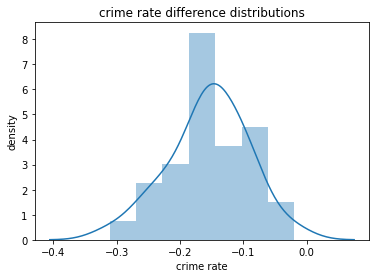

In [32]:
crime_rate_diff = pd.Series(final_data['crime_rate_diff'])
ax = sns.distplot(crime_rate_diff)
ax.set_title('crime rate difference distributions')
ax.set_xlabel('crime rate')
ax.set_ylabel('density')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

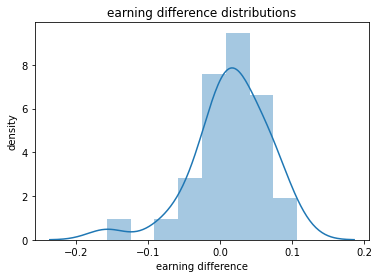

In [33]:
earning_per_hour_diff = pd.Series(final_data['earning_per_hour_diff'])
ax = sns.distplot(earning_per_hour_diff)
ax.set_title('earning difference distributions')
ax.set_xlabel('earning difference')
ax.set_ylabel('density')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

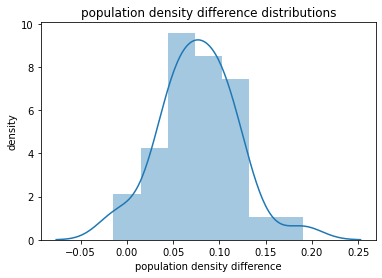

In [34]:
pop_density_diff = pd.Series(final_data['pop_density_diff'])
ax = sns.distplot(pop_density_diff)
ax.set_title('population density difference distributions')
ax.set_xlabel('population density difference')
ax.set_ylabel('density')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

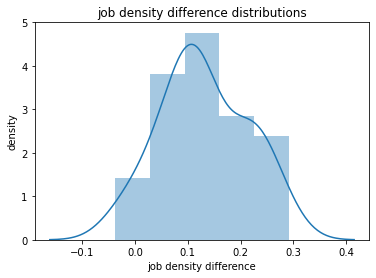

In [35]:
job_density_diff = pd.Series(final_data['job_density_diff'])
ax = sns.distplot(job_density_diff)
ax.set_title('job density difference distributions')
ax.set_xlabel('job density difference')
ax.set_ylabel('density')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

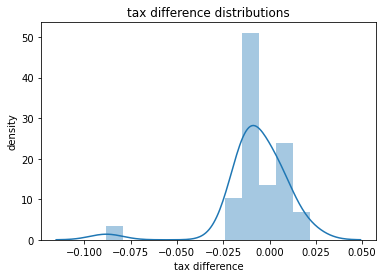

In [36]:
tax_diff = pd.Series(final_data['tax_diff'])
ax = sns.distplot(tax_diff)
ax.set_title('tax difference distributions')
ax.set_xlabel('tax difference')
ax.set_ylabel('density')

In [37]:
final_data.corr()

,house_price_diff,crime_rate_diff,earning_per_hour_diff,job_density_diff,pop_density_diff,tax_diff
house_price_diff,1.000000,-0.127135,-0.205583,0.382040,0.177506,-0.214240
crime_rate_diff,-0.127135,1.000000,-0.135406,-0.018129,-0.267220,0.079926
earning_per_hour_diff,-0.205583,-0.135406,1.000000,-0.401690,0.105414,-0.006398
job_density_diff,0.382040,-0.018129,-0.401690,1.000000,-0.196719,-0.290117
pop_density_diff,0.177506,-0.267220,0.105414,-0.196719,1.000000,0.232863
tax_diff,-0.214240,0.079926,-0.006398,-0.290117,0.232863,1.000000


<AxesSubplot:>

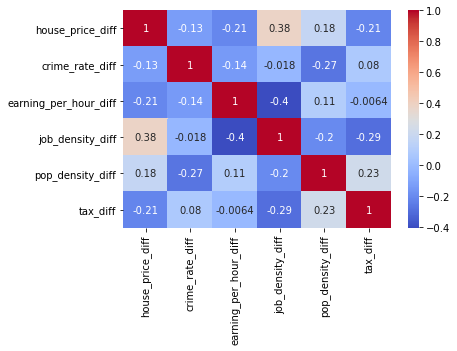

In [39]:
sns.heatmap(final_data.corr(),annot=True,cmap='coolwarm')

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):

    while True:
      
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
       
        vif_df = vif_df.drop('const')        
        
        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break

    return df

In [41]:
final_data = final_data[['house_price_diff','crime_rate_diff', 'earning_per_hour_diff', 'job_density_diff', 'pop_density_diff', 'tax_diff']]
final_data_new = drop_column_using_vif_(final_data.drop('house_price_diff', axis=1))

In [42]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# This performs a multiple regression of wellbeing against greenery and natural light:
multi_regression_model= smf.ols(formula='house_price_diff ~ crime_rate_diff + earning_per_hour_diff + job_density_diff + pop_density_diff + tax_diff ',data=final_data).fit()

# And this gives a big summary of the results:
print(multi_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:       house_price_diff   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1.709
Date:                Tue, 19 Jan 2021   Prob (F-statistic):              0.168
Time:                        05:30:23   Log-Likelihood:                 36.485
No. Observations:                  32   AIC:                            -60.97
Df Residuals:                      26   BIC:                            -52.18
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.37

In [44]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# This performs a multiple regression of wellbeing against greenery and natural light:
multi_regression_model= smf.ols(formula='house_price_diff ~ earning_per_hour_diff + job_density_diff + pop_density_diff + tax_diff ',data=final_data).fit()

# And this gives a big summary of the results:
print(multi_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:       house_price_diff   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     2.198
Date:                Tue, 19 Jan 2021   Prob (F-statistic):             0.0960
Time:                        05:33:25   Log-Likelihood:                 36.448
No. Observations:                  32   AIC:                            -62.90
Df Residuals:                      27   BIC:                            -55.57
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.37

In [45]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# This performs a multiple regression of wellbeing against greenery and natural light:
multi_regression_model= smf.ols(formula='house_price_diff ~ job_density_diff + pop_density_diff + tax_diff ',data=final_data).fit()

# And this gives a big summary of the results:
print(multi_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:       house_price_diff   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     2.910
Date:                Tue, 19 Jan 2021   Prob (F-statistic):             0.0519
Time:                        05:35:28   Log-Likelihood:                 36.280
No. Observations:                  32   AIC:                            -64.56
Df Residuals:                      28   BIC:                            -58.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3707      0.044  

In [46]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# This performs a multiple regression of wellbeing against greenery and natural light:
multi_regression_model= smf.ols(formula='house_price_diff ~ job_density_diff + pop_density_diff',data=final_data).fit()

# And this gives a big summary of the results:
print(multi_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:       house_price_diff   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     3.909
Date:                Tue, 19 Jan 2021   Prob (F-statistic):             0.0314
Time:                        05:36:43   Log-Likelihood:                 35.757
No. Observations:                  32   AIC:                            -65.51
Df Residuals:                      29   BIC:                            -61.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3759      0.043  

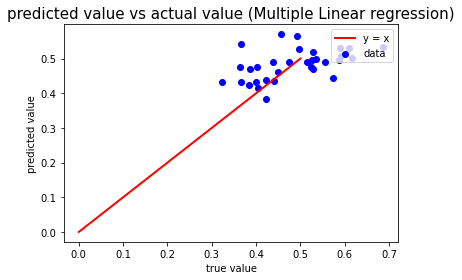

In [43]:
X = final_data[['crime_rate_diff','earning_per_hour_diff','job_density_diff','pop_density_diff','tax_diff']]
y = final_data[['house_price_diff']]
y_pred = multi_regression_model.predict(X)
n = np.linspace(0, 0.5)
h = n

plt.plot(n,h,'r',linewidth=2,label = "y = x")
plt.scatter(y,y_pred, color="blue", label = "data")
plt.xlabel('true value',fontsize=10) 
plt.ylabel('predicted value',fontsize=10)
plt.legend(loc="upper right")
plt.title('predicted value vs actual value (Multiple Linear regression)',fontsize=15)
plt.show()

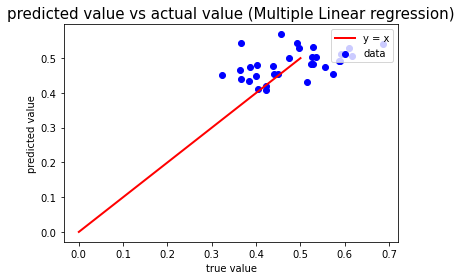

In [47]:
X = final_data[['job_density_diff','pop_density_diff','tax_diff']]
y = final_data[['house_price_diff']]
y_pred = multi_regression_model.predict(X)
n = np.linspace(0, 0.5)
h = n

plt.plot(n,h,'r',linewidth=2,label = "y = x")
plt.scatter(y,y_pred, color="blue", label = "data")
plt.xlabel('true value',fontsize=10) 
plt.ylabel('predicted value',fontsize=10)
plt.legend(loc="upper right")
plt.title('predicted value vs actual value (Multiple Linear regression)',fontsize=15)
plt.show()